In [1]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Load Iris dataset
iris = load_iris()
train_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
train_data['species'] = iris.target

In [3]:
train_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
train_data.shape

(150, 5)

In [6]:
train_data['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
y_train = train_data['species'].values
x_train = train_data.drop(columns = ['species']).values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [9]:
x_train[0]

array([4.8, 3. , 1.4, 0.1])

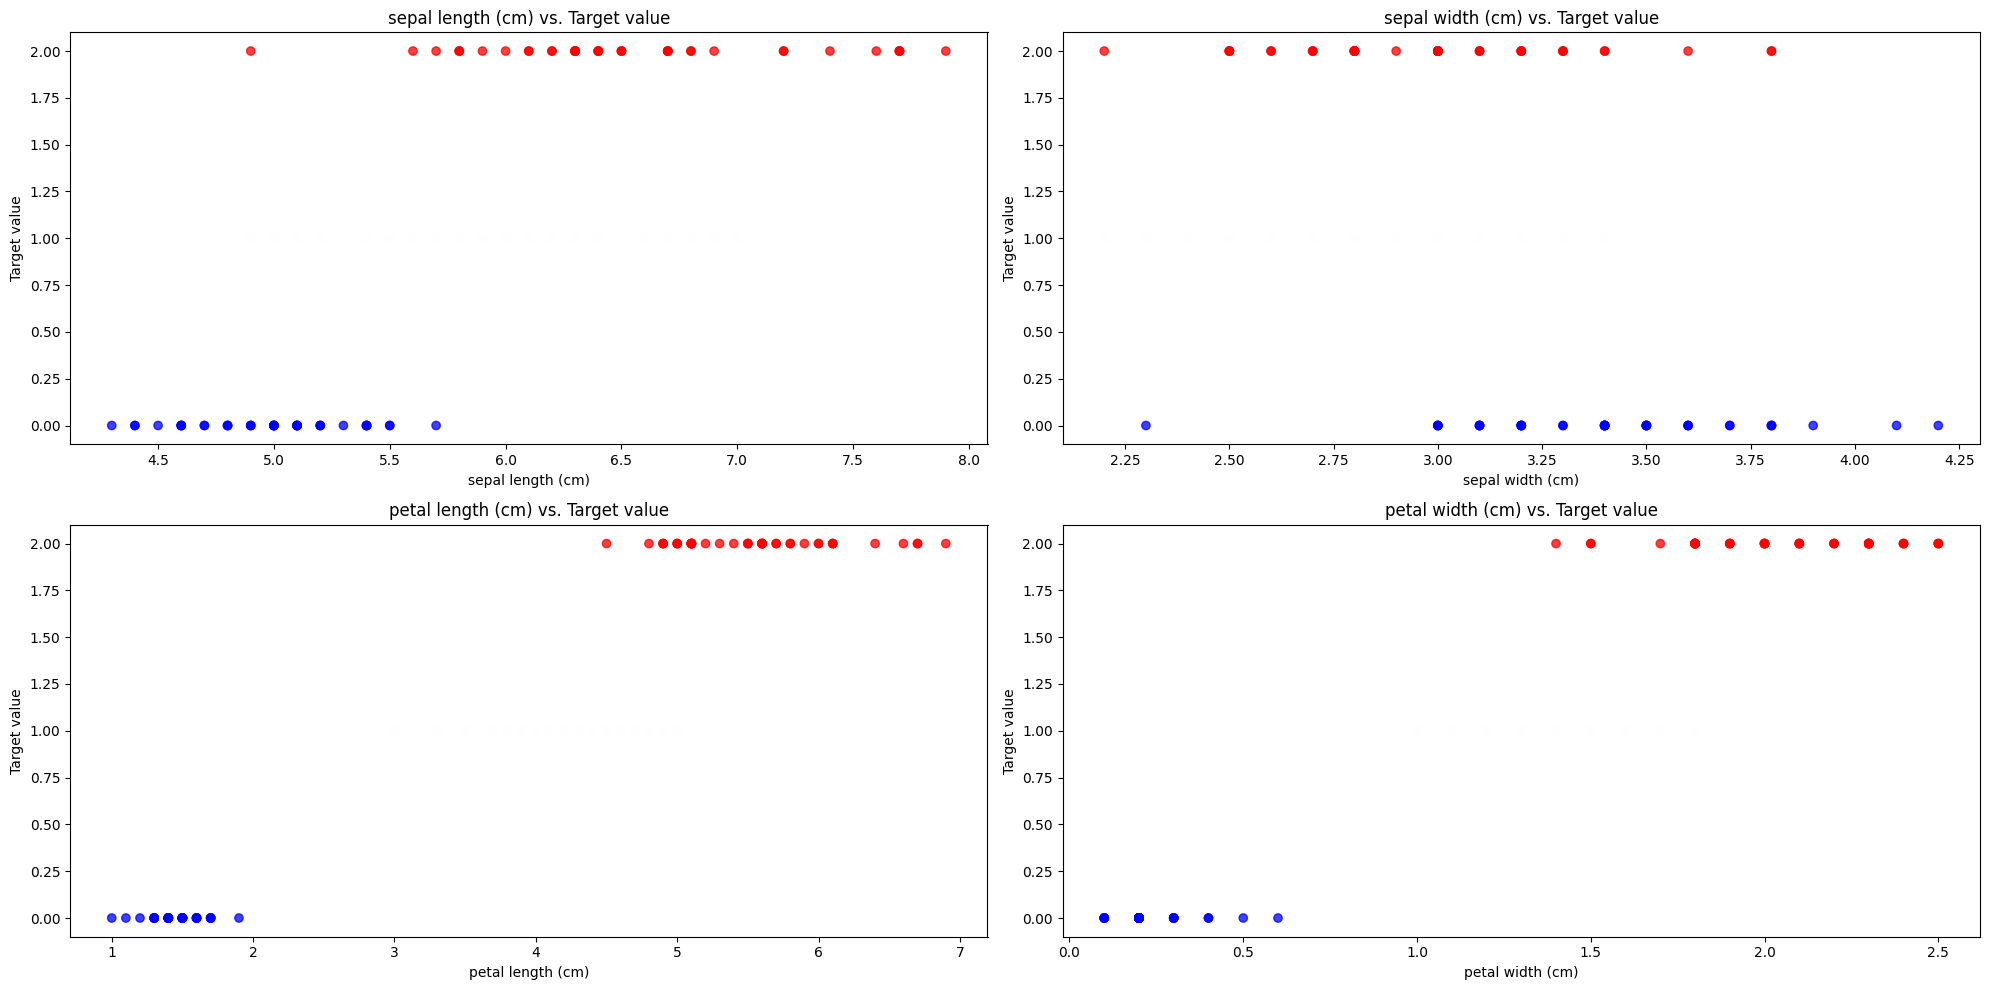

In [10]:
# Visualize data
# plotting each features against the output variable y

y_train = y_train.reshape(-1)

# list of feature names
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot each feature against the binary target
for k in range(4):  # We only have 8 subplots, adjust as necessary
    i = k // 2  # Row index
    j = k % 2   # Column index
    axes[i, j].scatter(x_train[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75)
    axes[i, j].set_title(f'{features[k]} vs. Target value')
    axes[i, j].set_xlabel(features[k])
    axes[i, j].set_ylabel('Target value')
# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# encode labels
from tensorflow.keras.utils import to_categorical
num_classes = 3
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [12]:
model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))  # First hidden layer with 8 neurons
model.add(Dense(6, activation='relu'))  # Second hidden layer with 6 neurons
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for 3 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
print("x_train : \n",x_train)
print("y_train : \n",y_train)

x_train : 
 [[4.8 3.  1.4 0.1]
 [6.3 2.3 4.4 1.3]
 [4.8 3.1 1.6 0.2]
 [6.  2.2 5.  1.5]
 [5.7 3.  4.2 1.2]
 [5.  3.6 1.4 0.2]
 [6.7 3.1 4.7 1.5]
 [6.7 3.1 5.6 2.4]
 [6.5 3.2 5.1 2. ]
 [5.3 3.7 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 2.8 4.  1.3]
 [5.5 2.6 4.4 1.2]
 [6.4 2.9 4.3 1.3]
 [6.2 3.4 5.4 2.3]
 [6.1 2.8 4.7 1.2]
 [5.7 2.6 3.5 1. ]
 [5.9 3.2 4.8 1.8]
 [7.7 3.  6.1 2.3]
 [4.4 3.  1.3 0.2]
 [7.2 3.6 6.1 2.5]
 [6.7 3.3 5.7 2.1]
 [4.3 3.  1.1 0.1]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.7 2.6 6.9 2.3]
 [4.6 3.1 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.9 3.  5.1 1.8]
 [6.5 3.  5.8 2.2]
 [7.7 2.8 6.7 2. ]
 [6.1 3.  4.9 1.8]
 [5.  3.5 1.6 0.6]
 [4.7 3.2 1.3 0.2]
 [6.7 3.1 4.4 1.4]
 [4.9 2.5 4.5 1.7]
 [7.4 2.8 6.1 1.9]
 [4.8 3.4 1.9 0.2]
 [5.4 3.7 1.5 0.2]
 [6.2 2.8 4.8 1.8]
 [5.7 2.8 4.1 1.3]
 [7.9 3.8 6.4 2. ]
 [6.2 2.9 4.3 1.3]
 [4.9 3.6 1.4 0.1]
 [6.2 2.2 4.5 1.5]
 [5.5 2.5 4.  1.3]
 [5.  2.3 3.3 1. ]
 [6.7 3.  5.2 2.3]
 [5.1 3.4 1.5 0.2]
 [6.5 3.  5.5 1.8]
 [6.3 3.4 5.6 2.4]


In [14]:
# training the model 
BATCH_SIZE = 16
epochs = 60
model.fit(x=x_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs, verbose=1)

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3500 - loss: 1.4785
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2883 - loss: 1.4123 
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3108 - loss: 1.3841 
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3298 - loss: 1.3429 
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3394 - loss: 1.2987 
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2912 - loss: 1.2886 
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2897 - loss: 1.2946 
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3266 - loss: 1.1882 
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3721 - loss: 1.1693 
Epoch 10/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3017 - loss: 1.2293 
Epoch 11/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3243 - loss: 1.1879 
Epoch 12/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3766 - loss: 1.1653 
Ep

In [15]:
# Evaluate train and test 
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2594 - loss: 1.0892  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1000 - loss: 1.0976
Train Loss: 1.0914115905761719, Train Accuracy: 0.25
Test Loss: 1.0975617170333862, Test Accuracy: 0.10000000149011612


In [16]:
# Predict labels on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# print vector of probabilities
print(f"What Softmax predicted: {y_pred}")

# print predicted number
print(f"What Softmax actually means: {y_pred_classes}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
What Softmax predicted: [[0.30195254 0.3429897  0.35505784]
 [0.31624135 0.3155242  0.36823443]
 [0.2972077  0.35219473 0.35059753]
 [0.3162231  0.31555903 0.36821783]
 [0.3182686  0.3116599  0.3700715 ]
 [0.30263248 0.34167394 0.3556936 ]
 [0.29983142 0.34709966 0.35306898]
 [0.31660214 0.3148359  0.36856195]
 [0.30048147 0.34583917 0.35367936]
 [0.2994042  0.34792838 0.3526674 ]
 [0.3031604  0.34065294 0.35618666]
 [0.3084737  0.33040637 0.36112002]
 [0.3173204  0.31346643 0.36921328]
 [0.31500575 0.31788352 0.36711067]
 [0.30683574 0.33355954 0.35960484]
 [0.31623587 0.31553465 0.36822945]
 [0.30091164 0.34500545 0.35408282]
 [0.29372758 0.3589722  0.34730026]
 [0.30330965 0.3403644  0.35632595]
 [0.30086812 0.3450898  0.35404205]
 [0.31622094 0.31556317 0.3682159 ]
 [0.31714612 0.31379858 0.36905536]
 [0.3058875  0.33538708 0.35872537]
 [0.3167312  0.31458968 0.36867908]
 [0.30755076 0.33218238 0.36026686]
 [0.30513152 0.33684546 0.35802305]
 [

In [17]:
# choose a random sample from all the test data
random_num = np.random.choice(len(x_test))
X_sample = x_test[random_num]

# save true label of this sample in a variable
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]

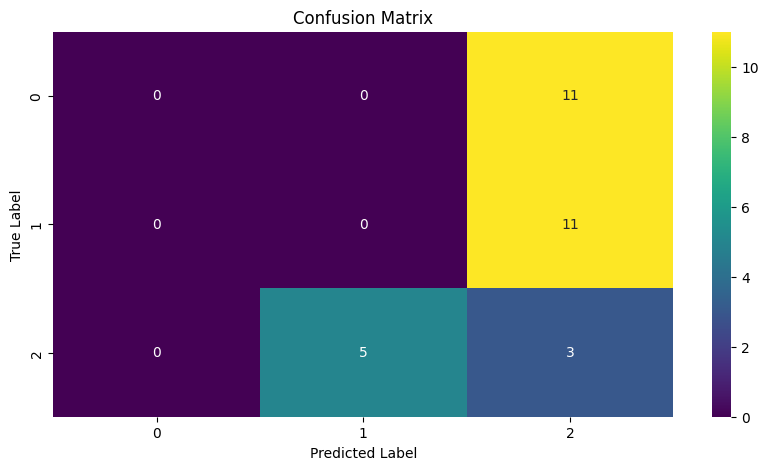

In [18]:
# generate a confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");